In [4]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime 

In [5]:
def plot_setup_start():
    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,0.2])
    ax = plt.subplot(gs[0, 0])
    leg = plt.subplot(gs[0, 1]); leg.axis('off')
    return fig, ax

def plot_setup_end(fig, ax, fs_numb, fs_str):
    ax.set_xticks([1, 2, 4])
    ax.set_xticklabels(['half', 'base', 'double'])
    ax.grid(which='major', axis='both', linestyle='-')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', which='both', length=0, labelsize=fs_numb)
    ax.set_ylabel('Normalized metric:\nvertical displacement', fontsize=fs_str, labelpad=20)
    ax.set_xlabel('Wind forcing cases', fontsize=fs_str, labelpad=20)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.get_offset_text().set_fontsize(fs_numb)

    fig.tight_layout()
    fig.patch.set_facecolor('white')    
    plt.subplots_adjust(top=0.99, wspace=0.1, hspace=0.1)
    
    return fig, ax

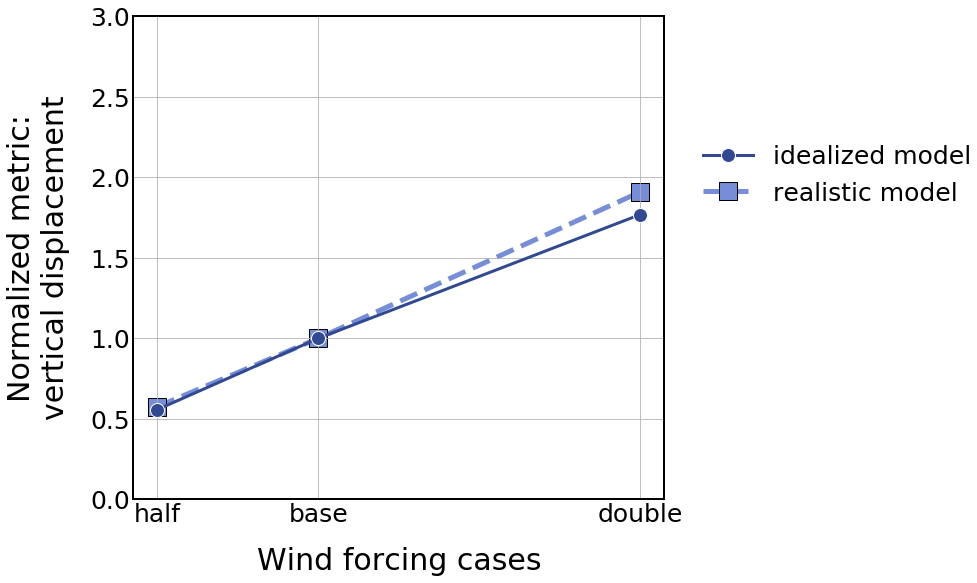

In [6]:
flag = 'upwelling'
figure_name = 'fig_comparison_upwelling.png'

fs_numb, fs_str = 25, 30
colors = ['#6580D2', '#283C78']
markers = ['o', 's']
kinds = ['ideal', 'real']
xs_list = [1, 2, 4]

fig, ax = plot_setup_start()

comp_matrix_r = np.loadtxt('./files/comparison_'+flag+'_'+'real.out', delimiter=",")
comp_list_r = comp_matrix_r[-1, 1:]

comp_matrix_i = np.loadtxt('./files/comparison_'+flag+'_'+'ideal.out', delimiter=",")
comp_list_i = comp_matrix_i[-1, 1:]

inds = np.where(np.isinf(comp_matrix_i[:-1, :])==True)
inds_row = inds[0][0]
inds_col = inds[1][0]
comp_matrix_i[inds_row, inds_col] = np.nan
comp_list_i[inds_col-1] = np.nanmean(comp_matrix_i[:-1, inds_col])

ls_i = ax.plot(xs_list, comp_list_i, 
               lw=3, marker='o', ms=14, c='#314992', ls='-', markeredgecolor='w', label='idealized model', zorder=2)
ls_r = ax.plot(xs_list, comp_list_r, 
               lw=5, marker='s', ms=18, c='#768ED7', ls='--', markeredgecolor='k', label='realistic model', zorder=1)

lns = ls_i + ls_r
labels = [l.get_label() for l in lns]
leg = fig.legend(lns, labels, loc='upper right', bbox_to_anchor=(1.15, 0.8), fontsize=fs_numb, ncol=1, frameon=False)
            
ax.set_aspect(aspect='equal')
ax.yaxis.set_ticks(np.arange(0, 3.5, 0.5))
ax.set_ylim([0, 3.0])
fig, ax = plot_setup_end(fig, ax, fs_numb, fs_str)
fig.savefig(figure_name, dpi=200, bbox_inches='tight', format='png', facecolor=fig.get_facecolor())